In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 
import matplotlib.patches as mpatches

In [2]:
modedatatype=([('file','i8'),('start','i8'),('end','i8'),('length','i8'),('mode','U1')])
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

In [3]:
file_names = glob.glob("../new_archive/all_pulse.paz.T.f512.b256.pdv")
file_names=sorted(file_names)

In [4]:
def frequency_calc(minf,maxf,frequency_list,rfi_channels):
    frange=maxf-minf
    scrunch=max(frequency_list)+1
    wband=int((frange/scrunch)//1)
    
    true_freq=[]

    for chan in frequency_list:

        w=0
        num_chan=0
        sums=np.array([])

        while w<wband:

            try: b=rfi_channels.index(int((wband*chan)+w))
            except ValueError:
                sums=np.append(sums,int((wband*chan)+w))

            w=w+1

        centre_bin=int(np.average(sums)//1)
        print(centre_bin,'       ',128-len(sums),'       ',int(wband*chan+(wband/2))-1)

        centre_frequ=(centre_bin)+minf

        true_freq.append(centre_frequ)
    return true_freq

In [116]:
maxf=500
minf=300
frange=maxf-minf
#scrunch=max(average['frequency'
bands=8
wband=frange/bands
frequency_list=np.array(range(0,bands))
frequency_list=frequency_list*(wband) +minf+(wband/2)
frequency_list=np.flipud(frequency_list) 


In [6]:
current_file = np.loadtxt(fname="../new_archive/all_pulse.paz.T.f512.b256.pdv", dtype=fulldatatype)

In [22]:
minp=0
maxp=130
minf=704
maxf=4032

In [20]:
#Defining frequency
no_freq=max(current_file['frequency'])+1
size_freq=(maxf-minf)/no_freq
halfsize_freq=size_freq/2

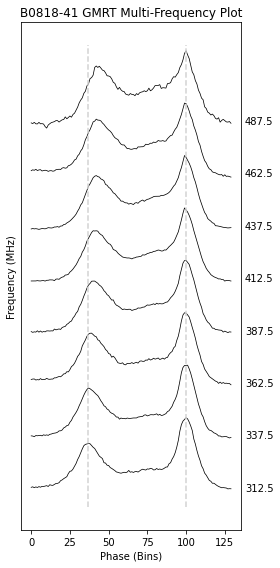

In [124]:
fig=plt.figure(figsize=(4, 8))
#Repeating for each profile
offset=5
for freq in range(0, no_freq):
    #Selecting only one frequency profile
    f=current_file['frequency'] == freq
    x=current_file['phase'][f]
    #xconv=max(x)
    #x=x/xconv
    y=current_file['intensity'][f]

    #Defining centre frequency
    #cf=int((freq*size_freq)+minf+halfsize_freq)
    cf=frequency_list[freq]

    if len(x)!=0 and len(y)!=0:
        #Normalising y
        y=(y/max(y))*35
        #creating offset
        y=y+cf
        #offset=offset+1
        labels=str(cf)

        #plt.plot(x,y,label=labels,color='black',lw=0.75)
        #plt.text(minp+0.025,offset-0.75,labels,fontsize=6)
        plt.plot(x[int(minp):int(maxp)],y[int(minp):int(maxp)],label=labels,color='black',lw=0.75)
        plt.text(maxp+8,cf,labels,fontsize=10)
        
        plt.yticks([])
        
        
plt.plot([37,37],[305,525],'--',color='lightgrey')
plt.plot([100,100],[305,525],'--',color='lightgrey')

plt.title('B0818-41 GMRT Multi-Frequency Plot')
plt.xlabel('Phase (Bins)')
plt.ylabel('Frequency (MHz)')
plt.tight_layout()
plt.savefig('figures/multif_plot')

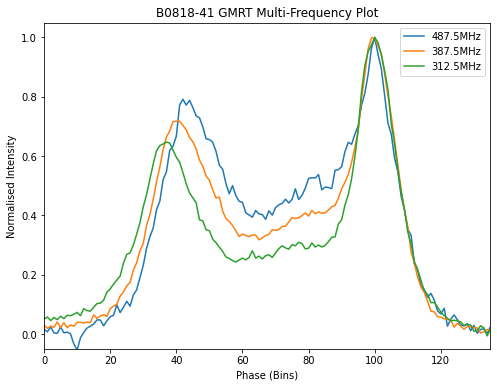

In [120]:
fig=plt.figure(figsize=(8, 6))
for freq in range(0, no_freq):
    #Selecting only one frequency profile
    f=current_file['frequency'] == freq
    x=current_file['phase'][f]
    #xconv=max(x)
    #x=x/xconv
    y=current_file['intensity'][f]
    

    #Defining centre frequency
    #cf=int((freq*size_freq)+minf+halfsize_freq)
    cf=frequency_list[freq-8]
    
    if freq==0 or freq==4 or freq==7:
        y=(y/max(y))
        labels=str(cf)+'MHz'
        plt.plot(x,y,label=labels)
        
plt.title('B0818-41 GMRT Multi-Frequency Plot')
plt.axis([0,135,-0.05, 1.05])
plt.ylabel('Normalised Intensity')
plt.xlabel('Phase (Bins)')
plt.legend()
plt.savefig('figures/multif_plot2')
        